# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Plot style

In [4]:
plt.style.use('ggplot')

#### Importing auxiliary functions

In [5]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [6]:
import auxiliary_functions as fc

#### Loading properties of the model

In [7]:
with open('data/model_multi.pickle') as f:
        model_multi = pickle.load(f)

#### Loading properties grid

In [8]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [9]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [10]:
result_RM_airb = dict()

### Saving files

In [11]:
saved_files = []

## Observation area

In [12]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 5500.0 m 
 x_min = -6500.0 m 
 y_max = 6500.0 m 
 y_min = -5500.0 m


### airborne survey information

In [13]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (49,25)
Number of data: 1225.0
dx: 250.0 m
dy: 500.0 m 


## Properties of the model

### Main field

In [14]:
inc_gf,dec_gf = model_multi['main_field']

In [15]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 40.0 degree
Main field declination: 22.0 degree


### Magnetization direction

In [16]:
print 'Inclination: %.1f degree' % model_multi['inc_R']
print 'Declination: %.1f degree' % model_multi['dec_R']

Inclination: 90.0 degree
Declination: 0.0 degree


In [17]:
inc_R,dec_R = model_multi['inc_R'],model_multi['dec_R']

## Generating the layer with my function 

In [18]:
h = 1150.

#### Generating a layer

In [19]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [20]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [21]:
i_pos = 1250

In [22]:
it_max = 30

In [23]:
it_marq = 15

In [24]:
lamb = 10.
dlamb = 100.

In [25]:
eps_e = 1e-4
eps_i = 1e-4

In [26]:
mu_list = [1e2,1e3,1e4,1e5,3.5*1e5,5*1e5,1e6,1.5*1e6] 

In [27]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.LM_NNLS(
        data['tfa_obs_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
12.24630242279212 -10.71051116187272
0.1696089126973009
i = 1
17.78410259363341 -11.502407340355807
0.16279940971202903
i = 2
21.726293990395654 -12.087603547853854
0.11086423985866302
i = 3
24.800181225554194 -12.566919094538923
0.08148167203079199
i = 4
27.32994722466229 -12.980238557649812
0.06359842847237182
i = 5
29.44679009213837 -13.329361529733895
0.04906425383198008
i = 6
31.25448569618118 -13.610111841734255
0.03808671209124013
i = 7
32.83300969367686 -13.840982667453696
0.030324998322652275
i = 8
34.238236638572594 -14.01486051561046
0.0247102847431237
i = 9
35.510681418235706 -14.133229781374707
0.02062439349917312
i = 10
36.67914774652324 -14.200981396151667
0.017605848307334988
i = 11
37.76112704403561 -14.225152278165694
0.015233746869854339
i = 12
38.770966014881026 -14.211541163356518
0.013362867181320515
i = 13
39.717722078639824 -14.162501574940144
0.011810224523744842
i = 14
40.60882775514512 -14.080002992119013
0.01051406726324672
i = 15
41.45122894068375 -13

77.1996794641512 12.563276397087682
0.0001634062003483047
i = 126
77.3153478628432 12.799280629839078
0.00015524062926106373
i = 127
77.42796049905787 13.033785876372352
0.00014759113512936408
i = 128
77.53753562326018 13.266210178767952
0.00014009047619407486
i = 129
77.6441414933169 13.496476294833732
0.00013294093870978014
i = 130
77.74786176338722 13.724525645770285
0.00012616397524805426
i = 131
77.8487430780931 13.950335213336603
0.00011967690603645215
i = 132
77.94679075172122 14.173868223439078
0.00011338853292651071
i = 133
78.04196653871858 14.39359098229885
0.00010696598143901705
i = 134
78.13425973312523 14.608628453790178
0.00010059447910320003
i = 135
78.22372683275644 14.817258171809158
0.0
i = 0
12.246302550385506 -10.710510822898566
0.169590988412527
i = 1
17.784103300425112 -11.502406805831365
0.16273478380760104
i = 2
21.726295191109756 -12.087603230137132
0.11080856720969724
i = 3
24.800182837953997 -12.566919370860534
0.08143439345878181
i = 4
27.329948790470752 -1

75.70589137762263 9.841972894669938
0.00028139493141168294
i = 115
75.85935890469446 10.099009415739124
0.0002680497938279649
i = 116
76.00871192264606 10.35486689252689
0.00025448033033519726
i = 117
76.15441728754826 10.609051745304798
0.00024252193507156338
i = 118
76.2968311734408 10.861354491734808
0.00023183793705704842
i = 119
76.4359056227019 11.111327760949727
0.0002211932053477717
i = 120
76.57164727925664 11.358929342305487
0.00021084632809133662
i = 121
76.70408667919371 11.604004813019975
0.00020082970089745422
i = 122
76.8330578334942 11.846593666397625
0.00019068100985128987
i = 123
76.95861614457799 12.087039014115183
0.00018104256025961406
i = 124
77.08081884876404 12.325984905921207
0.00017196100869484006
i = 125
77.19968304224182 12.563309725442242
0.00016316148434558327
i = 126
77.31535028507196 12.79931634986257
0.00015500772522995774
i = 127
77.42796582683289 13.033826166508797
0.00014737918976740874
i = 128
77.537543560593 13.266255043410089
0.0001398892413609854

73.72419241674524 7.0685502997183205
0.0004648877040759733
i = 104
73.92729136187413 7.311583827211336
0.0004471014726567227
i = 105
74.12596697589231 7.557345375581238
0.0004289227506714237
i = 106
74.32018728153245 7.8056771205436934
0.0004110231051657303
i = 107
74.50989176291405 8.056383523004659
0.00039329162986858463
i = 108
74.69482506694935 8.309318862355079
0.00037505671402138685
i = 109
74.87502798546284 8.563770750591452
0.00035727342393278907
i = 110
75.05059865789313 8.819065379401803
0.00034013395476805824
i = 111
75.22154805746449 9.075075604063768
0.00032348331822989616
i = 112
75.38786094017179 9.331597574648193
0.0003072100984682796
i = 113
75.54953740097022 9.588413071087235
0.00029136304537769487
i = 114
75.70696181680198 9.845315723755283
0.000277121458273436
i = 115
75.8603702592558 10.102016329844771
0.0002639189344685344
i = 116
76.00966343357089 10.357777264887227
0.00025060645882349505
i = 117
76.15530830489267 10.611878878964289
0.00023882225659850516
i = 118

71.88911198190068 5.204776666915186
0.0005632562015510649
i = 94
72.12605287355751 5.435895587216162
0.0005437054010996796
i = 95
72.35867845126945 5.669657916569068
0.0005244726508588434
i = 96
72.58720947825499 5.906084735594145
0.0005065620479473055
i = 97
72.81160546717537 6.144979035549866
0.0004888019461890878
i = 98
73.03175378211527 6.386256045055024
0.00047095446918390835
i = 99
73.24754221768029 6.631077018850511
0.0004534535448291179
i = 100
73.4587640823618 6.879318422369542
0.00043555355396603356
i = 101
73.66533271243273 7.130812628835969
0.00041772420474980024
i = 102
73.8672254376712 7.385417875640199
0.00040022390381043373
i = 103
74.06437599270073 7.642940486599589
0.0003828866553339267
i = 104
74.25677740082318 7.903192502802255
0.00036593533319728277
i = 105
74.44439671768643 8.165943223662685
0.00034927140800059523
i = 106
74.6271989252089 8.430819289415215
0.0003328537426710049
i = 107
74.80535608239911 8.697248297316264
0.0003172829592399366
i = 108
74.9789538855

73.57456228860003 8.206861103590674
0.0004584795425434305
i = 90
73.80761777814295 8.545537413334534
0.00043761159485932545
i = 91
74.03519593487584 8.882325509742461
0.00041704240328234974
i = 92
74.25725099344182 9.216965855991678
0.0003968598172902169
i = 93
74.47372405147526 9.549231282840662
0.0003770423702835278
i = 94
74.68459592945551 9.878863758235848
0.0003577081067301588
i = 95
74.88992091173739 10.205829075581775
0.0003391307953661457
i = 96
75.08990924965146 10.530633614207161
0.0003218667164041134
i = 97
75.28451538522623 10.852827716529127
0.0003049006133776282
i = 98
75.47389827138328 11.172117378211968
0.0002888225834363154
i = 99
75.6580898215717 11.4882500967687
0.00027328125421857875
i = 100
75.83709881385246 11.801631713024117
0.00025836305811868413
i = 101
76.01112959303312 12.112704051981172
0.000244526705299457
i = 102
76.18027060085643 12.421292707712908
0.00023130527720469115
i = 103
76.34455558349099 12.727000693625275
0.00021850632395744942
i = 104
76.503981

77.27365879191689 13.561461081614711
0.000206261071760818
i = 98
77.43153569093386 13.953207229202476
0.00019246782551977774
i = 99
77.5836032760662 14.339519827612747
0.00017927128955012056
i = 100
77.73003426755747 14.71989356965762
0.00016683791060582593
i = 101
77.87110664081725 15.094207798816335
0.0001553828463932132
i = 102
78.00706773875329 15.462385947261883
0.00014480093031645177
i = 103
78.1380320189676 15.824094785721007
0.00013478420741466982
i = 104
78.26405791523239 16.17915409013535
0.00012525058960892758
i = 105
78.38517966456378 16.527150298311113
0.00011611201733565798
i = 106
78.50149160540799 16.86771636173342
0.0001074537401812389
i = 107
78.61411423708218 17.19927467395466
0.0
i = 0
12.533345713523548 -10.792190020045675
0.1547973275923004
i = 1
18.274162099234605 -11.663614309932347
0.13266510829650752
i = 2
22.33658894864028 -12.340528750007303
0.08518701663774383
i = 3
25.522623980253567 -12.93507572094689
0.06107757062099565
i = 4
28.151209649315817 -13.45624

62.505861714435696 -14.099792851872667
0.004099981934234639
i = 30
63.51043167776403 -13.917118496196906
0.003918771603323911
i = 31
64.49934569008092 -13.722058753085193
0.0037387086292994197
i = 32
65.47065575357479 -13.515040718845377
0.003553605047039697
i = 33
66.4232244707221 -13.29537456361709
0.00337047896045296
i = 34
67.35508205593113 -13.05801846916856
0.0031846639710495918
i = 35
68.26282437136635 -12.801866202248878
0.002986902787781488
i = 36
69.14288265560224 -12.526419498988593
0.002777992062876112
i = 37
69.99780592528806 -12.238007454640204
0.0025923410243386645
i = 38
70.82556532397498 -11.936414092947544
0.00240554689449524
i = 39
71.62507848519488 -11.624242544295978
0.0022223825538058004
i = 40
72.39534895386484 -11.297326724561138
0.0020449478897445156
i = 41
73.13485558133257 -10.954511848139667
0.0018706168425622807
i = 42
73.84476470225826 -10.593450365962392
0.0017125900166177082
i = 43
74.52692062119888 -10.212073736617311
0.001572388622446587
i = 44
75.1810

## L-curve visualization

<Figure size 648x648 with 0 Axes>

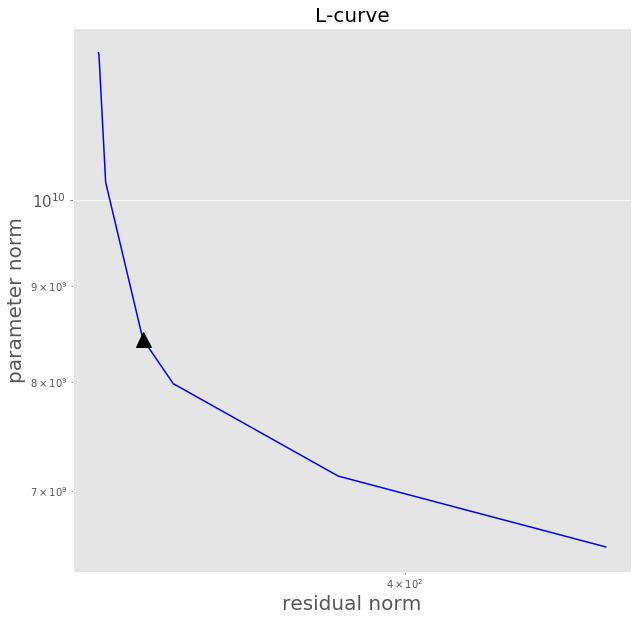

In [33]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r[4],norm_m[4], 'k^',markersize=15)
plt.title('L-curve', fontsize=title_font)
plt.xlabel('residual norm', fontsize = title_font)
plt.ylabel('parameter norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [29]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [30]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [31]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [32]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
